In [266]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [267]:
df = pd.read_csv("../data/2016-2017se.csv", thousands=',', encoding='euc-kr')
df.head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%)
0,세종,2016-01-01,-5.7,-7.3,-3.6,36.0
1,세종,2016-01-02,-5.0,-9.9,-0.7,34.0
2,세종,2016-01-03,-3.7,-11.2,2.5,51.0
3,세종,2016-01-04,1.9,-2.3,9.8,51.0
4,세종,2016-01-05,3.6,-3.4,8.5,50.0


In [268]:
df1 = pd.read_csv("../data/2016-2017seseek.csv", thousands=',', encoding='euc-kr')
df1.head()

,지점,일시,환자수
0,세종,2016-01-01,60
1,세종,2016-01-02,172
2,세종,2016-01-03,130
3,세종,2016-01-04,47
4,세종,2016-01-05,192


In [269]:
df2 = pd.read_csv("../data/2016-2017ojeon.csv", thousands=',', encoding='euc-kr')
df2.head()

,일시,평균 오존전량(DU)
0,2016-01-01,354.9
1,2016-01-02,365.5
2,2016-01-03,373.2
3,2016-01-04,339.8
4,2016-01-05,269.9


In [270]:
df = pd.merge(df, df1, on="일시")
df.head()

,지점_x,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),지점_y,환자수
0,세종,2016-01-01,-5.7,-7.3,-3.6,36.0,세종,60
1,세종,2016-01-02,-5.0,-9.9,-0.7,34.0,세종,172
2,세종,2016-01-03,-3.7,-11.2,2.5,51.0,세종,130
3,세종,2016-01-04,1.9,-2.3,9.8,51.0,세종,47
4,세종,2016-01-05,3.6,-3.4,8.5,50.0,세종,192


In [271]:
del df['지점_y']

In [272]:
df.head()

,지점_x,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),환자수
0,세종,2016-01-01,-5.7,-7.3,-3.6,36.0,60
1,세종,2016-01-02,-5.0,-9.9,-0.7,34.0,172
2,세종,2016-01-03,-3.7,-11.2,2.5,51.0,130
3,세종,2016-01-04,1.9,-2.3,9.8,51.0,47
4,세종,2016-01-05,3.6,-3.4,8.5,50.0,192


In [273]:
df = pd.merge(df, df2, on="일시")
df.head()

,지점_x,일시,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),환자수,평균 오존전량(DU)
0,세종,2016-01-01,-5.7,-7.3,-3.6,36.0,60,354.9
1,세종,2016-01-02,-5.0,-9.9,-0.7,34.0,172,365.5
2,세종,2016-01-03,-3.7,-11.2,2.5,51.0,130,373.2
3,세종,2016-01-04,1.9,-2.3,9.8,51.0,47,339.8
4,세종,2016-01-05,3.6,-3.4,8.5,50.0,192,269.9


In [274]:
df.rename(columns={df.columns[0] : '지점',
                    df.columns[1] : '날짜'},inplace=True)
df.head()

,지점,날짜,평균기온(°C),최저기온(°C),최고기온(°C),최소 상대습도(%),환자수,평균 오존전량(DU)
0,세종,2016-01-01,-5.7,-7.3,-3.6,36.0,60,354.9
1,세종,2016-01-02,-5.0,-9.9,-0.7,34.0,172,365.5
2,세종,2016-01-03,-3.7,-11.2,2.5,51.0,130,373.2
3,세종,2016-01-04,1.9,-2.3,9.8,51.0,47,339.8
4,세종,2016-01-05,3.6,-3.4,8.5,50.0,192,269.9


In [275]:
df['최고기온(°C)'] = df['최고기온(°C)'] - df['최저기온(°C)'] 
df.rename(columns={ df.columns[2] : '평균기온',
                    df.columns[3] : '최저기온',
                    df.columns[4] : '일교차',
                    df.columns[5] : '최소상대습도',
                    df.columns[7] : '오존량'},inplace=True)
df.head()

,지점,날짜,평균기온,최저기온,일교차,최소상대습도,환자수,오존량
0,세종,2016-01-01,-5.7,-7.3,3.7,36.0,60,354.9
1,세종,2016-01-02,-5.0,-9.9,9.2,34.0,172,365.5
2,세종,2016-01-03,-3.7,-11.2,13.7,51.0,130,373.2
3,세종,2016-01-04,1.9,-2.3,12.1,51.0,47,339.8
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,192,269.9


In [276]:
df['습도위험지수'] = 'NaN'
df['최저기온위험지수'] = 'NaN'
df['일교차위험지수'] = 'NaN'
df['오존위험지수'] = 'NaN'
df.head()

,지점,날짜,평균기온,최저기온,일교차,최소상대습도,환자수,오존량,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수
0,세종,2016-01-01,-5.7,-7.3,3.7,36.0,60,354.9,NaN,NaN,NaN,NaN
1,세종,2016-01-02,-5.0,-9.9,9.2,34.0,172,365.5,NaN,NaN,NaN,NaN
2,세종,2016-01-03,-3.7,-11.2,13.7,51.0,130,373.2,NaN,NaN,NaN,NaN
3,세종,2016-01-04,1.9,-2.3,12.1,51.0,47,339.8,NaN,NaN,NaN,NaN
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,192,269.9,NaN,NaN,NaN,NaN


In [277]:
#습도는 절대값으로 한다.
for i in df.index:
    if df.values[i,2] < 17 :
        if df.values[i,5] >70:
            df['습도위험지수'].values[i] = '1'
        elif 59< df.values[i,5] <70:
            df['습도위험지수'].values[i] = '2'
        elif 49< df.values[i,5] <60:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
    elif 17<df.values[i,2] < 21:
        if df.values[i,5] >60:
            df['습도위험지수'].values[i] = '1'
        elif 49< df.values[i,5] <60:
            df['습도위험지수'].values[i] = '2'
        elif 39< df.values[i,5] <50:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
            
    elif 20<df.values[i,2] < 24:
        if df.values[i,5] >50:
            df['습도위험지수'].values[i] = '1'
        elif 39< df.values[i,5] <50:
            df['습도위험지수'].values[i] = '2'
        elif 29< df.values[i,5] <40:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
    elif df.values[i,2] > 23:
        if df.values[i,5] >40:
            df['습도위험지수'].values[i] = '1'
        elif 29< df.values[i,5] <40:
            df['습도위험지수'].values[i] = '2'
        elif 19< df.values[i,5] <30:
            df['습도위험지수'].values[i] = '3'
        else:
            df['습도위험지수'].values[i] = '4'
            
    if df.values[i,3] <-7.7 or 30<=df.values[1,3]: 
        df['최저기온위험지수'].values[i] = '4' 
    elif -7.7<=df.values[i,3] <-0.5:
        df['최저기온위험지수'].values[i] = '3' 
    elif -0.5<=df.values[i,3] < 12.6:
        df['최저기온위험지수'].values[i] = '2'  
    elif 12.6<=df.values[i,3] <30:
        df['최저기온위험지수'].values[i] = '1'  
        
    if df.values[i,4] < 8.6 : 
        df['일교차위험지수'].values[i] = '1' 
    elif 8.6<= df.values[i,4] < 12.3: 
        df['일교차위험지수'].values[i] = '2'  
    elif 12.3<=df.values[i,4] < 15.8:  
        df['일교차위험지수'].values[i] = '3'  
    elif 15.8<= df.values[i,4] : 
        df['일교차위험지수'].values[i] = '4' 
        
    if df.values[i,7] < 300:
        df['오존위험지수'].values[i] = '1'
    elif 300<=df.values[i,7] <348.7:
        df['오존위험지수'].values[i] = '2'
    elif 348.7<=df.values[i,7] <386.4:
        df['오존위험지수'].values[i] = '3'
    elif 386.4<= df.values[i,7]:
        df['오존위험지수'].values[i] = '4'  

In [278]:
df.head()

,지점,날짜,평균기온,최저기온,일교차,최소상대습도,환자수,오존량,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수
0,세종,2016-01-01,-5.7,-7.3,3.7,36.0,60,354.9,4,3,1,3
1,세종,2016-01-02,-5.0,-9.9,9.2,34.0,172,365.5,4,4,2,3
2,세종,2016-01-03,-3.7,-11.2,13.7,51.0,130,373.2,3,4,3,3
3,세종,2016-01-04,1.9,-2.3,12.1,51.0,47,339.8,3,3,2,2
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,192,269.9,3,3,2,1


In [280]:
df['최소상대습도'] = 100 - df['최소상대습도']
df.head()

,지점,날짜,평균기온,최저기온,일교차,최소상대습도,환자수,오존량,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수
0,세종,2016-01-01,-5.7,-7.3,3.7,64.0,60,354.9,4,3,1,3
1,세종,2016-01-02,-5.0,-9.9,9.2,66.0,172,365.5,4,4,2,3
2,세종,2016-01-03,-3.7,-11.2,13.7,49.0,130,373.2,3,4,3,3
3,세종,2016-01-04,1.9,-2.3,12.1,49.0,47,339.8,3,3,2,2
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,192,269.9,3,3,2,1


In [282]:
temr =df['일교차'].corr(df['환자수'])
hum = df['최소상대습도'].corr(df['환자수'])
oj = df['오존량'].corr(df['환자수'])
mtem = df['최저기온'].corr(df['환자수'])
al = temr+hum+(-oj)+(-mtem)
temr,hum,-oj,-mtem

(0.04173874484748547,
 0.054066488441645855,
 0.11367693089535894,
 0.30409193695524483)

In [283]:
temr = temr/al
hum = hum/al
oj = -oj/al
mtem = -mtem/al

temr, hum, oj, mtem

(0.08127112476049302,
 0.10527495121280511,
 0.22134474975097956,
 0.5921091742757223)

In [284]:
al = temr+hum+oj+mtem

In [299]:
df['ALI'] = float('NaN')
df.head()

,지점,날짜,평균기온,최저기온,일교차,최소상대습도,환자수,오존량,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수,ALI
0,세종,2016-01-01,-5.7,-7.3,3.7,64.0,60,354.9,4,3,1,3,NaN
1,세종,2016-01-02,-5.0,-9.9,9.2,66.0,172,365.5,4,4,2,3,NaN
2,세종,2016-01-03,-3.7,-11.2,13.7,49.0,130,373.2,3,4,3,3,NaN
3,세종,2016-01-04,1.9,-2.3,12.1,49.0,47,339.8,3,3,2,2,NaN
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,192,269.9,3,3,2,1,NaN


In [302]:
#세종 최저 0.59, 오존 0.22, 습도 0.11, 일교차 0.08
#습도 최저 일교차 오존
for i in df.index:
    df['ALI'].values[i] = 0.11*float(df.values[i,8])+0.59*float(df.values[i,9])+0.08*float(df.values[i,10])+0.22*float(df.values[i,11])
    
df.head()

,지점,날짜,평균기온,최저기온,일교차,최소상대습도,환자수,오존량,습도위험지수,최저기온위험지수,일교차위험지수,오존위험지수,ALI
0,세종,2016-01-01,-5.7,-7.3,3.7,64.0,60,354.9,4,3,1,3,2.95
1,세종,2016-01-02,-5.0,-9.9,9.2,66.0,172,365.5,4,4,2,3,3.62
2,세종,2016-01-03,-3.7,-11.2,13.7,49.0,130,373.2,3,4,3,3,3.59
3,세종,2016-01-04,1.9,-2.3,12.1,49.0,47,339.8,3,3,2,2,2.70
4,세종,2016-01-05,3.6,-3.4,11.9,50.0,192,269.9,3,3,2,1,2.48


In [303]:
df.to_csv("../data/sejongalldata2.csv", encoding='utf-8', sep=',') 

In [304]:
la = pd.read_csv("../data/2016-2017last.csv", thousands=',', encoding='euc-kr') 
la.head() 

,지점,일시,ALU지수값
0,세종,2016-01-01,NaN
1,세종,2016-01-02,NaN
2,세종,2016-01-03,NaN
3,세종,2016-01-04,NaN
4,세종,2016-01-05,NaN


In [306]:
for i in df.index:
    if df.values[i,12] >= 3.0525:
        la['ALU지수값'].values[i] = '4'
    elif 2.6452<=df.values[i,12] < 3.0525:
        la['ALU지수값'].values[i] = '3'
    elif 1.5354<=df.values[i,12] <2.6452:
        la['ALU지수값'].values[i] = '2'
    elif 1<= df.values[i,12]<1.5354:
        la['ALU지수값'].values[i] = '1'  
la.head()

,지점,일시,ALU지수값
0,세종,2016-01-01,3.0
1,세종,2016-01-02,4.0
2,세종,2016-01-03,4.0
3,세종,2016-01-04,3.0
4,세종,2016-01-05,2.0


In [307]:
df['환자'] = df['환자수']/125

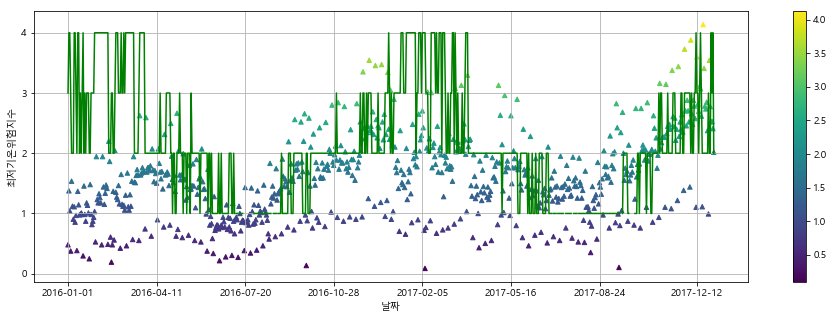

In [309]:
colormap=df['환자'] 
plt.figure(figsize=(16,5)) 
plt.plot(la['일시'],la['ALU지수값'], color = 'green') 
plt.scatter(df['날짜'],df['환자'],s=20,c=colormap,marker='^') 
plt.xticks([0, 100, 200, 300, 400, 500, 600, 710]) 
plt.xlabel('날짜') 
plt.ylabel('최저기온위험지수') 
plt.colorbar() 
plt.grid() 
plt.show() 